In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [37]:
data=pd.read_csv("C:/Users/User/Downloads/DataSet/bank.csv")

data
data.shape

(11162, 17)

In [30]:
data['education'].value_counts() #do fo all the columns

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [31]:
data.isnull().sum() #check null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
#data.education = data.education.astype(float)

In [32]:
data['education']=data['education'].replace('unknown',0)
data['education']=data['education'].replace('primary',1)
data['education']=data['education'].replace('secondary',2)
data['education']=data['education'].replace('tertiary',3)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,2,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,2,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,2,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,2,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,3,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,3,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,3,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,2,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,2,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,2,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [38]:
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
5,24,4,2,2,0,424,1,1,2,4,8,560,1,0,0,3,1
6,38,4,1,2,0,1241,1,1,2,5,8,1140,0,0,0,3,1
7,42,5,0,1,0,968,1,0,2,5,8,1009,0,0,0,3,1
8,19,9,1,1,0,425,1,0,2,5,8,606,0,0,0,3,1
9,10,7,2,1,0,3202,1,0,2,5,8,1197,2,0,0,3,1


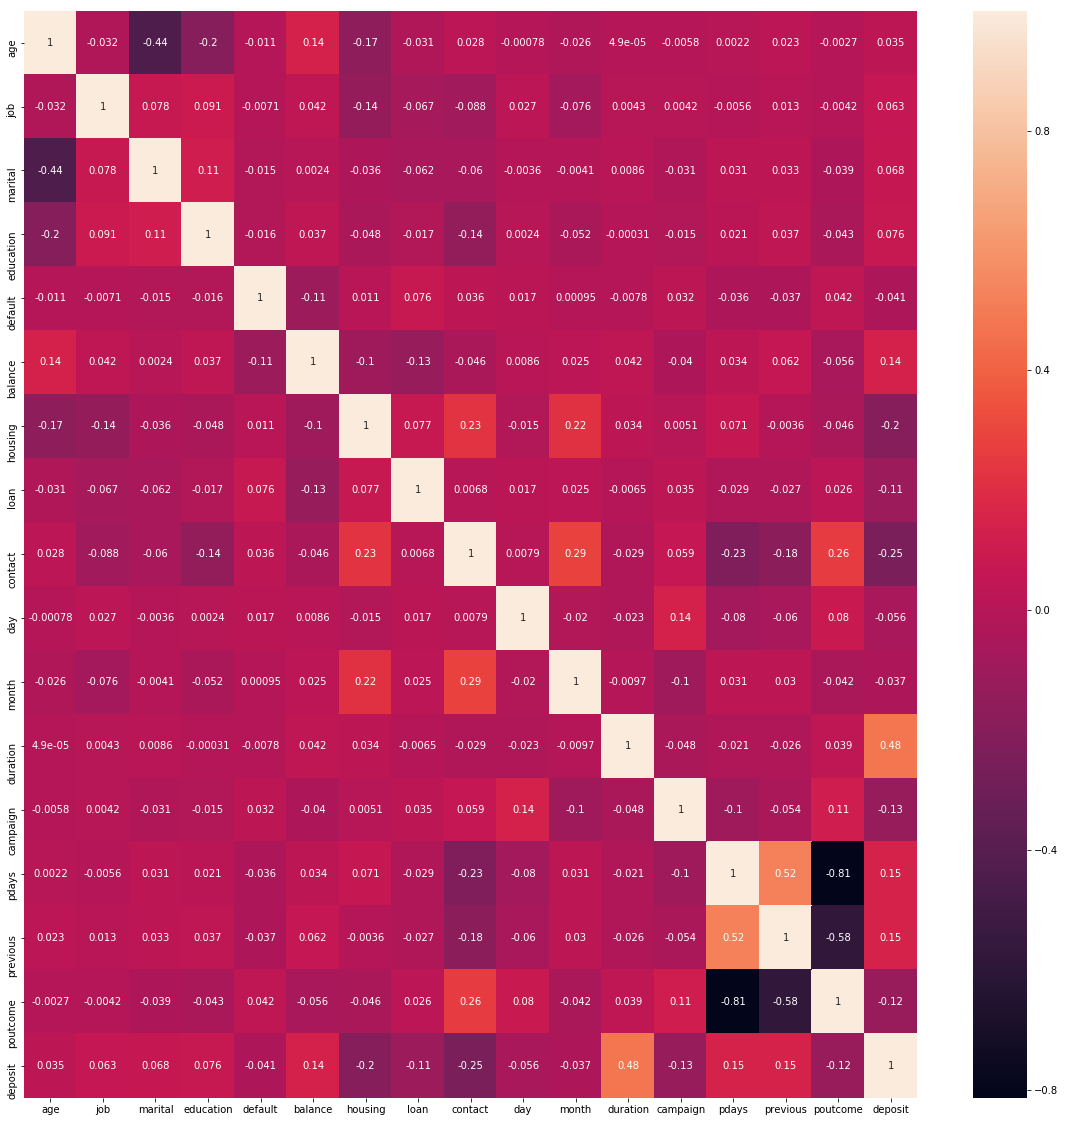

In [14]:
plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

In [45]:
X=data.drop(['age','job','default','housing','contact','day','month','campaign','previous','poutcome','deposit'],axis=1,inplace=False)
Y=data['deposit']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1455  337]
 [ 498 1059]]


In [47]:
TN, FP    = confusion_matrix[0, 0], confusion_matrix[0, 1]
FN, TP    = confusion_matrix[1, 0], confusion_matrix[1, 1]

In [50]:
Accuracy = (float(TP+TN)/float(TP+FP+FN+TN))
print('Accuracy:        ',  round(Accuracy,2) ,"\n")
Precision = (float(TP)/float(TP+FP))
print('Precision:        ',  round(Precision,2) ,"\n")
Recall = (float(TP)/float(TP+FN))
print ('Recall:        ',round(Recall,2))
Specificity = (float(TN)/float(TN+FP))
print ('Sepcificity:        ',  round(Specificity,2))
F1Score = (2*Precision*Recall)/(Precision+Recall)
print ('F1 Score        ',  round(F1Score,2) )

Accuracy:         0.75 

Precision:         0.76 

Recall:         0.68
Sepcificity:         0.81
F1 Score         0.72
